# Algoritmo KMeans

## Link para o notebook principal

[Notebook principal - main.ipynb](./main.ipynb)

## Tabela de Índices

- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando Datasets Tratados](#importando-os-datasets-tratados)
- [Preparando os Hiper-parâmetros](#preparando-os-hiper-parametros)
- [Usando o Algoritmo](#utilizando-o-algoritmo-kmeans)

## Importando os pacotes e bibliotecas

In [23]:
from sklearn.metrics import silhouette_score, pairwise_distances, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import estimate_bandwidth
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from utils import parametros
from models import kmeans
import seaborn as sns
import pandas as pd
import numpy as np

## Importando os datasets tratados

In [24]:
df_iris_raw = pd.read_csv("./databases/raw/Iris.csv", sep = ",", index_col = "Id")
df_titanic_processed = pd.read_pickle("./databases/processed/titanic_processado.pkl")
df_coracao_processed = pd.read_pickle("./databases/processed/coracao_processado.pkl")

## Preparando os hiper-parametros

### Separando os **X** e **y** de todos os datasets

In [25]:
min_max_scaler = MinMaxScaler()

X_iris = df_iris_raw.drop(columns = ["Species"]).values
y_iris = df_iris_raw["Species"]

X_titanic = min_max_scaler.fit_transform(df_titanic_processed.drop(columns = ["Survived", "Name"]).values)
y_titanic = df_titanic_processed["Survived"]

X_coracao = min_max_scaler.fit_transform(df_coracao_processed.drop(columns = ["target"]).values)
y_coracao = df_coracao_processed["target"]

### Lendo os hiper-parametros de um arquivo e os salvando em uma classe

In [26]:
hiper_parametros_kmeans = parametros.ParametrosKmeans(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_kmeans.txt")
hiper_parametros_meanshift = parametros.ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt")
hiper_parametros_cmeans = parametros.ParametrosCmeans(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_cmeans.txt")

## Utilizando o algoritmo Kmeans

In [27]:
soma_dos_quadrados_iris = []
soma_dos_quadrados_titanic = []
soma_dos_quadrados_coracao = []

for i in range(1, 14):
    Kmeans = kmeans.Kmeans(nro_clusters = i,
                           nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiper_parametros_kmeans.getTolerancia(),
                           semente = hiper_parametros_kmeans.getSemente_randomica(),
                           fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                           algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
    Kmeans.fit(X_iris)
    soma_dos_quadrados_iris.append(Kmeans.getDistanciaAoQuadrado())
    
    Kmeans = kmeans.Kmeans(nro_clusters = i,
                           nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiper_parametros_kmeans.getTolerancia(),
                           semente = hiper_parametros_kmeans.getSemente_randomica(),
                           fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                           algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
    Kmeans.fit(X_titanic)
    soma_dos_quadrados_titanic.append(Kmeans.getDistanciaAoQuadrado())
    
    Kmeans = kmeans.Kmeans(nro_clusters = i,
                           nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiper_parametros_kmeans.getTolerancia(),
                           semente = hiper_parametros_kmeans.getSemente_randomica(),
                           fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                           algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
    Kmeans.fit(X_coracao)
    soma_dos_quadrados_coracao.append(Kmeans.getDistanciaAoQuadrado())

### Imprimindo o resultado dos testes

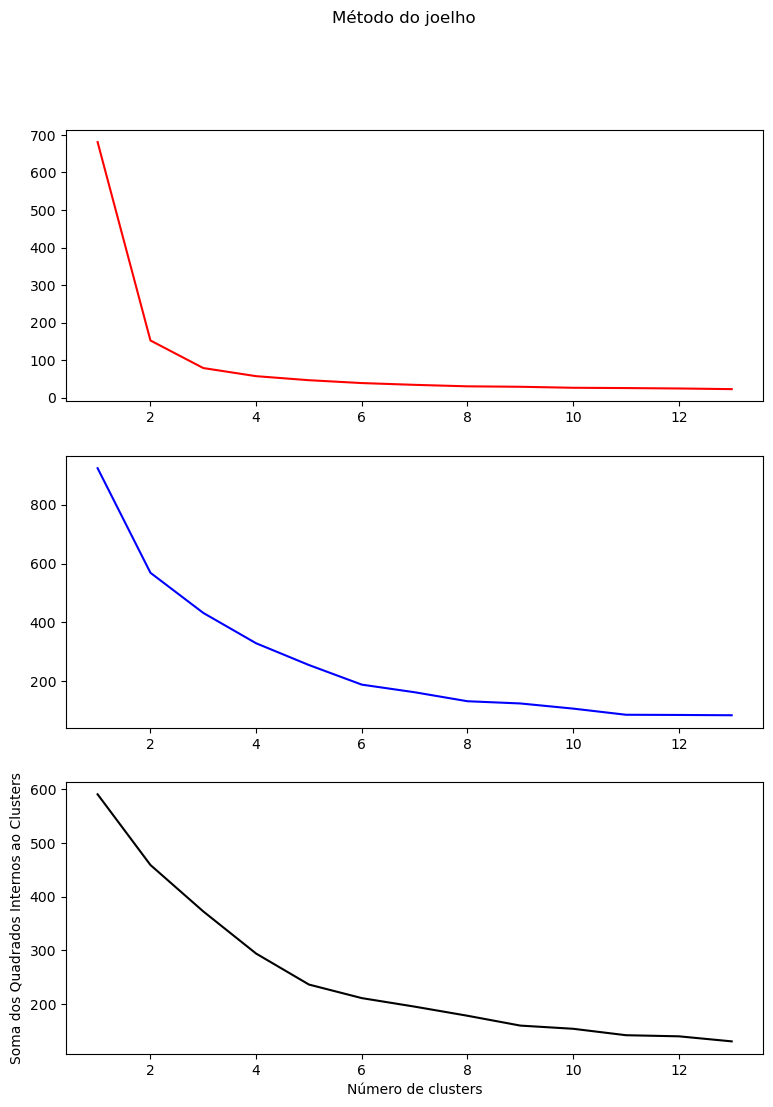

In [28]:
figura, eixos = plt.subplots(3, 1, figsize = (9, 12))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

eixos[0].plot(range(1, 14), soma_dos_quadrados_iris, color = "red")
eixos[1].plot(range(1, 14), soma_dos_quadrados_titanic, color = "blue")
eixos[2].plot(range(1, 14), soma_dos_quadrados_coracao, color = "black")

plt.show()

No caso acima, o resultado a partir do número 3 decai muito, portanto o número de clusters escolhido é:
- `3` para o dataset `Iris`;
- `2` para o dataset `Titanic`;
- `2` para o dataset `Coração`.

### Implementando a clusterização

#### Dataset Iris

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.65, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [30]:
kmeans_iris = kmeans.Kmeans(nro_clusters = 3,
                            nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                            tolerancia = hiper_parametros_kmeans.getTolerancia(),
                            semente = hiper_parametros_kmeans.getSemente_randomica(),
                            fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                            algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
kmeans_iris.fit(X_train)
y_kmeans_iris = kmeans_iris.predict(X = X_test)

##### Visualizando os clusters

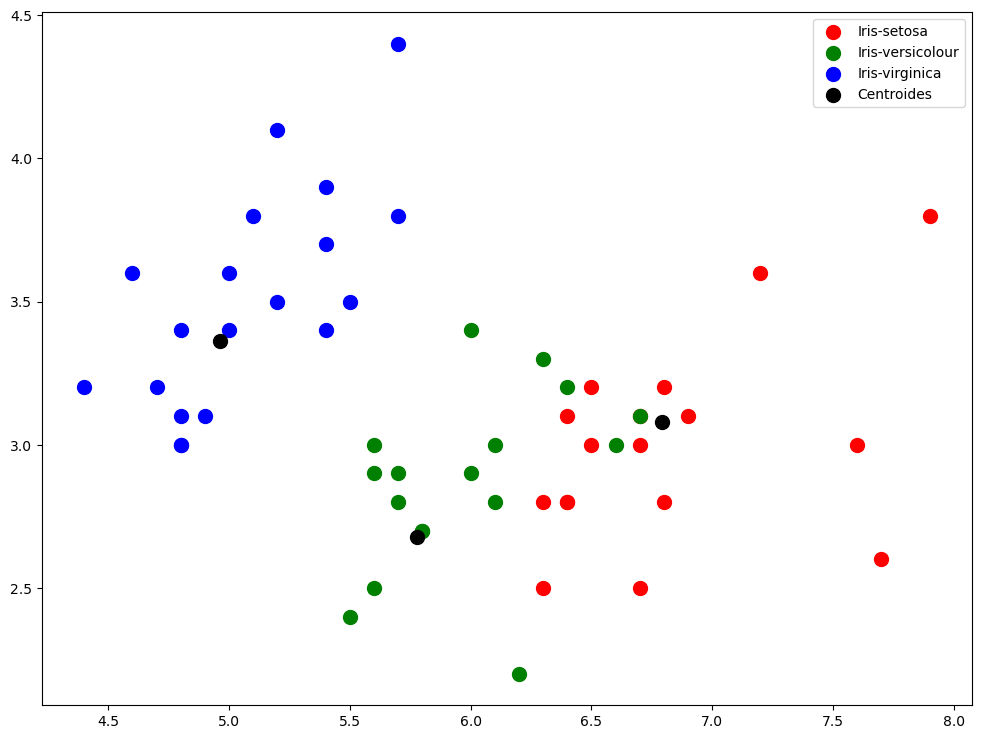

In [31]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_test[y_kmeans_iris == 0, 0], X_test[y_kmeans_iris == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(X_test[y_kmeans_iris == 1, 0], X_test[y_kmeans_iris == 1, 1], s = 100, c = "green", label = "Iris-versicolour")
plt.scatter(X_test[y_kmeans_iris == 2, 0], X_test[y_kmeans_iris == 2, 1], s = 100, c = "blue", label = "Iris-virginica")

### OS CENTROIDES
plt.scatter(kmeans_iris.getCentroides()[:, 0], kmeans_iris.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Iris

In [32]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(X_train, kmeans_iris.getLabels(), metric = metrica))

davies_bouldin = davies_bouldin_score(X_train, kmeans_iris.getLabels())
print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

SILHOUETTE SCORE:  [0.5474853348994807, 0.48802877100381326, 0.5439819212386819, 0.5474853348994807, 0.5439819212386819, 0.5474853348994807]
DAVIS-BOULDIN SCORE:  0.6563478438075016


#### Dataset Titanic

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, train_size = 0.65, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [34]:
kmeans_titanic = kmeans.Kmeans(nro_clusters = 2,
                                nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiper_parametros_kmeans.getTolerancia(),
                                semente = hiper_parametros_kmeans.getSemente_randomica(),
                                fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                                algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
kmeans_titanic.fit(X_train)
y_kmeans_titanic = kmeans_titanic.predict(X = X_test)

##### Visualizando os clusters

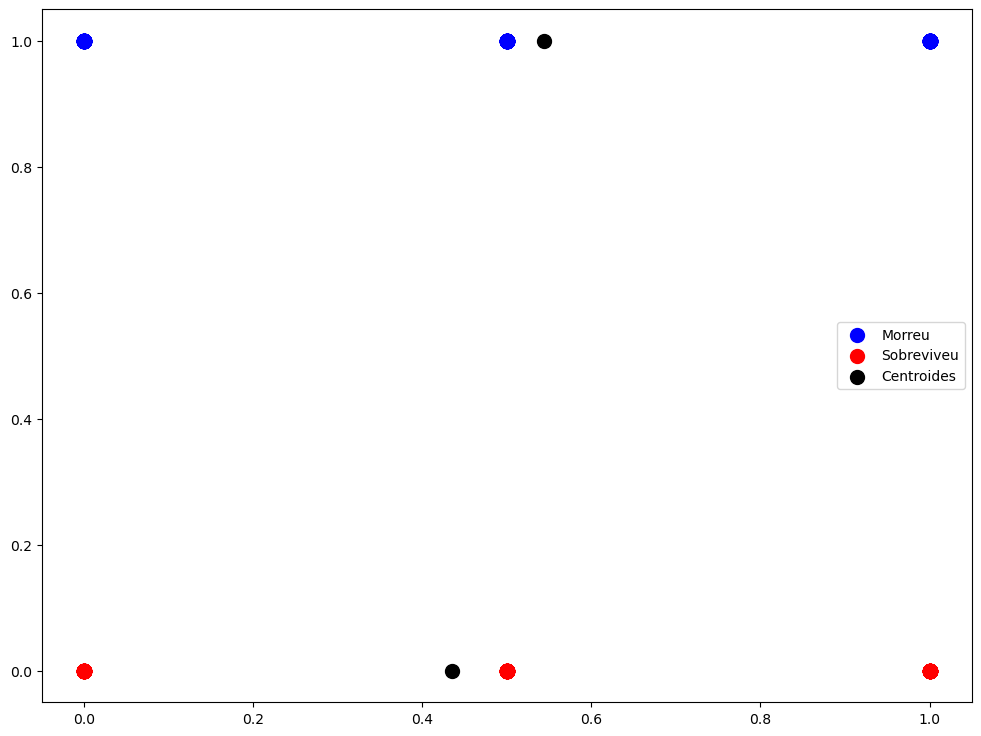

In [35]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_test[y_kmeans_titanic == 0, 0], X_test[y_kmeans_titanic == 0, 1], s = 100, c = "blue", label = "Morreu")
plt.scatter(X_test[y_kmeans_titanic == 1, 0], X_test[y_kmeans_titanic == 1, 1], s = 100, c = "red", label = "Sobreviveu")

### OS CENTROIDES
plt.scatter(kmeans_titanic.getCentroides()[:, 0], kmeans_titanic.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Titanic

In [36]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(X_train, kmeans_titanic.getLabels(), metric = metrica))

davies_bouldin = davies_bouldin_score(X_train, kmeans_titanic.getLabels())
print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

SILHOUETTE SCORE:  [0.48239054797757, 0.5489398779208984, 0.4176574168973989, 0.48239054797757, 0.4176574168973989, 0.48239054797757]
DAVIS-BOULDIN SCORE:  1.1369415311735744


#### Dataset Coração

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_coracao, y_coracao, train_size = 0.65, random_state = hiper_parametros_kmeans.getSemente_randomica())

In [38]:
kmeans_coracao = kmeans.Kmeans(nro_clusters = 2,
                               nro_max_iteracao = hiper_parametros_kmeans.getNro_maximo_iteracoes(),
                               tolerancia = hiper_parametros_kmeans.getTolerancia(),
                               semente = hiper_parametros_kmeans.getSemente_randomica(),
                               fazer_copia = hiper_parametros_kmeans.getFazer_copia(),
                               algoritmo = hiper_parametros_kmeans.getAlgoritmo_kmeans())
kmeans_coracao.fit(X_train)
y_kmeans_coracao = kmeans_coracao.predict(X_test)

##### Visualizando os clusters

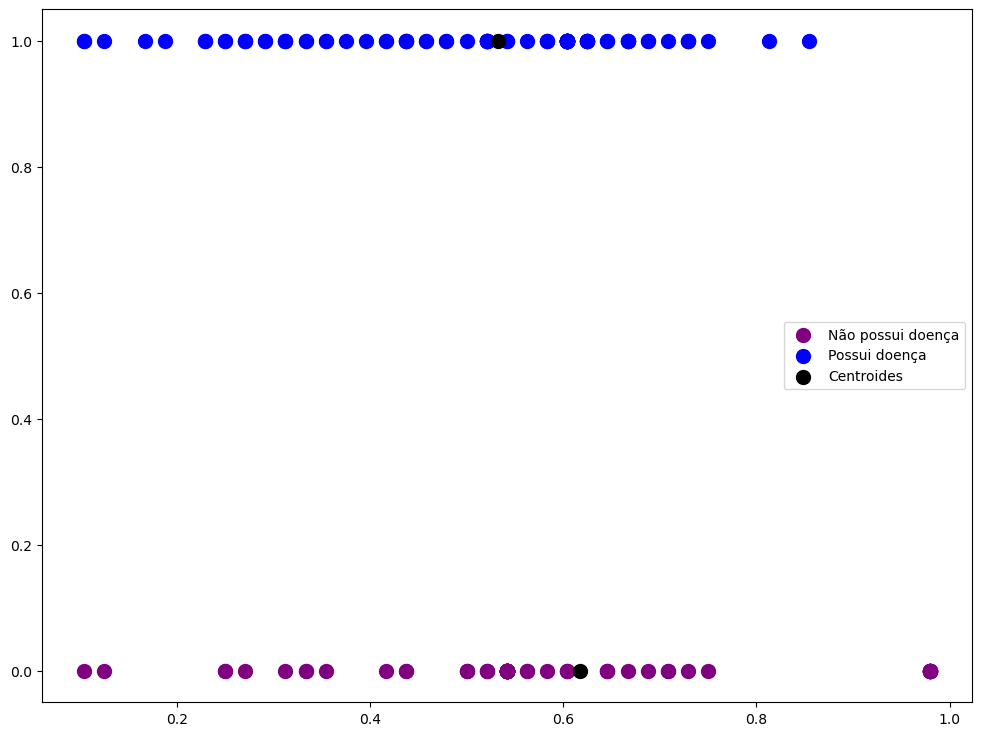

In [39]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_test[y_kmeans_coracao == 0, 0], X_test[y_kmeans_coracao == 0, 1], s = 100, c = "purple", label = "Não possui doença")
plt.scatter(X_test[y_kmeans_coracao == 1, 0], X_test[y_kmeans_coracao == 1, 1], s = 100, c = "blue", label = "Possui doença")

### OS CENTROIDES
plt.scatter(kmeans_coracao.getCentroides()[:, 0], kmeans_coracao.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Coração

In [41]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’

silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(X_train, kmeans_coracao.getLabels(), metric = metrica))

davies_bouldin = davies_bouldin_score(X_train, kmeans_coracao.getLabels())
print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

SILHOUETTE SCORE:  [0.27349613578099097, 0.3704616412315266, 0.23838986879813837, 0.27349613578099097, 0.23838986879813837, 0.27349613578099097]
DAVIS-BOULDIN SCORE:  1.8105346369170232
